In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Coffee Chain.csv")

In [ ]:
df.head()

,Area Code,Ddate,Market,Market Size,Product,Product Type,State,Type,Budget Cogs,Budget Margin,...,Budget Sales,Coffee Sales,Cogs,Inventory,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses
0,970,1/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,821,139,26,1,1,101,38
1,719,2/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,232,95,809,137,26,1,1,99,38
2,720,3/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,240,234,95,799,139,26,1,1,101,38
3,303,4/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,150,...,250,245,100,822,145,28,1,1,105,40
4,720,5/1/12,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,110,150,...,260,256,104,871,152,29,1,1,112,40


In [ ]:
df.shape

(4248, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area Code          4248 non-null   int64 
 1   Ddate              4248 non-null   object
 2   Market             4248 non-null   object
 3   Market Size        4248 non-null   object
 4   Product            4248 non-null   object
 5   Product Type       4248 non-null   object
 6   State              4248 non-null   object
 7   Type               4248 non-null   object
 8   Budget Cogs        4248 non-null   int64 
 9   Budget Margin      4248 non-null   int64 
 10  Budget Profit      4248 non-null   int64 
 11  Budget Sales       4248 non-null   object
 12  Coffee Sales       4248 non-null   int64 
 13  Cogs               4248 non-null   int64 
 14  Inventory          4248 non-null   object
 15  Margin             4248 non-null   int64 
 16  Marketing          4248 non-null   int64 


In [ ]:
#Find total product in this coffee chain
Total_product = df[['Product']].value_counts().reset_index()

In [ ]:
Total_product

,Product,0
0,Caffe Mocha,480
1,Colombian,480
2,Lemon,480
3,Decaf Espresso,408
4,Chamomile,384
5,Darjeeling,384
6,Decaf Irish Cream,384
7,Earl Grey,288
8,Green Tea,288
9,Caffe Latte,216


In [ ]:
Goods_type = df['Product Type'].value_counts()

In [ ]:
print(Goods_type)

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64


In [ ]:
df["Ddate"] = pd.to_datetime(df["Ddate"])

In [ ]:
df["Ddate"]

0      2012-01-01
1      2012-02-01
2      2012-03-01
3      2012-04-01
4      2012-05-01
          ...    
4243   2013-08-01
4244   2013-09-01
4245   2013-10-01
4246   2013-11-01
4247   2013-12-01
Name: Ddate, Length: 4248, dtype: datetime64[ns]

In [ ]:
sales_year = df.groupby(df.Ddate.dt.year)['Coffee Sales'].sum()
print(sales_year)

Ddate
2012    401159
2013    418652
Name: Coffee Sales, dtype: int64


In [ ]:
profit_year = df.groupby(df.Ddate.dt.year)['Profit'].sum()
print(profit_year)

Ddate
2012    105826
2013    153717
Name: Profit, dtype: int64


In [ ]:
#Sales by market
sales_market = df.groupby(df.Market)['Coffee Sales'].sum()
print(sales_market)

Market
Central    265045
East       178576
South      103926
West       272264
Name: Coffee Sales, dtype: int64


In [ ]:
#Coffee Sales group by market and state
group_market = df.groupby(['Market', 'State'])['Coffee Sales'].sum().reset_index()
display(group_market)

,Market,State,Coffee Sales
0,Central,Colorado,48179
1,Central,Illinois,69883
2,Central,Iowa,54750
3,Central,Missouri,24647
4,Central,Ohio,34517
5,Central,Wisconsin,33069
6,East,Connecticut,25429
7,East,Florida,37443
8,East,Massachusetts,29965
9,East,New Hampshire,14887


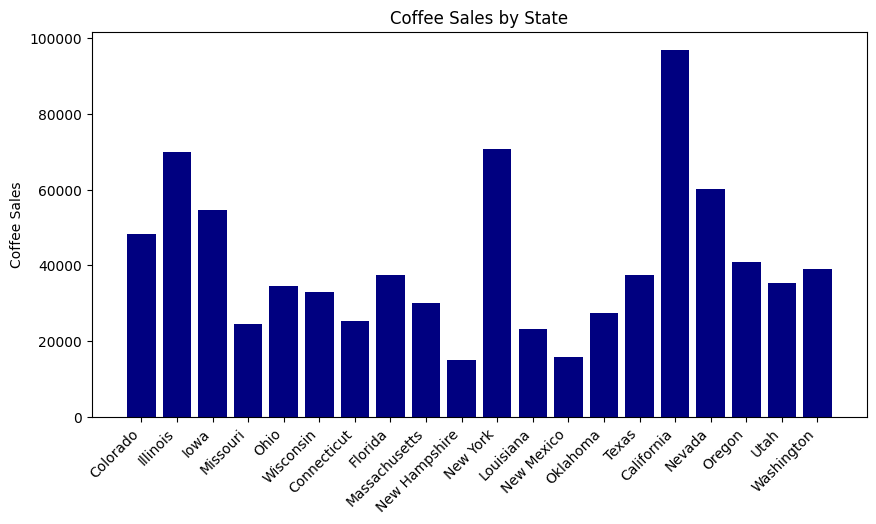

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
plt.bar(group_market['State'], group_market['Coffee Sales'], color = 'Navy')
plt.xticks(rotation=45, ha='right')
plt.xlabel(None)
plt.ylabel('Coffee Sales')
plt.title('Coffee Sales by State')
plt.show()

In [ ]:
#Add year and month column
import calendar

df['Year'] = df['Ddate'].dt.strftime('%Y')
df['Month'] = df['Ddate'].dt.strftime('%m')

df.head()

,Area Code,Ddate,Market,Market Size,Product,Product Type,State,Type,Budget Cogs,Budget Margin,...,Cogs,Inventory,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses,Year,Month
0,970,2012-01-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,95,821,139,26,1,1,101,38,2012,01
1,719,2012-02-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,95,809,137,26,1,1,99,38,2012,02
2,720,2012-03-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,95,799,139,26,1,1,101,38,2012,03
3,303,2012-04-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,150,...,100,822,145,28,1,1,105,40,2012,04
4,720,2012-05-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,110,150,...,104,871,152,29,1,1,112,40,2012,05


In [ ]:
#Profit by month-year
month_profit = df.groupby(df['Ddate'].dt.month)['Profit'].sum()
display(month_profit)


Ddate
1     20565
2     20788
3     20780
4     21533
5     21295
6     22789
7     23576
8     22771
9     21135
10    21552
11    20859
12    21900
Name: Profit, dtype: int64

In [ ]:
df['MonthID'] = df['Ddate'].apply(lambda x: x.strftime('%Y-%m') )

In [ ]:
df.head()

,Area Code,Ddate,Market,Market Size,Product,Product Type,State,Type,Budget Cogs,Budget Margin,...,Inventory,Margin,Marketing,Number of Records,Number Of Records,Profit,Total Expenses,Year,Month,MonthID
0,970,2012-01-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,821,139,26,1,1,101,38,2012,01,2012-01
1,719,2012-02-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,809,137,26,1,1,99,38,2012,02,2012-02
2,720,2012-03-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,140,...,799,139,26,1,1,101,38,2012,03,2012-03
3,303,2012-04-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,100,150,...,822,145,28,1,1,105,40,2012,04,2012-04
4,720,2012-05-01,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,110,150,...,871,152,29,1,1,112,40,2012,05,2012-05


MonthID
2012-01     8041
2012-02     8369
2012-03     8365
2012-04     8670
2012-05     8947
2012-06     9571
2012-07     9905
2012-08     9566
2012-09     8508
2012-10     8674
2012-11     8399
2012-12     8811
2013-01    12524
2013-02    12419
2013-03    12415
2013-04    12863
2013-05    12348
2013-06    13218
2013-07    13671
2013-08    13205
2013-09    12627
2013-10    12878
2013-11    12460
2013-12    13089
Name: Profit, dtype: int64


<Axes: xlabel='MonthID'>

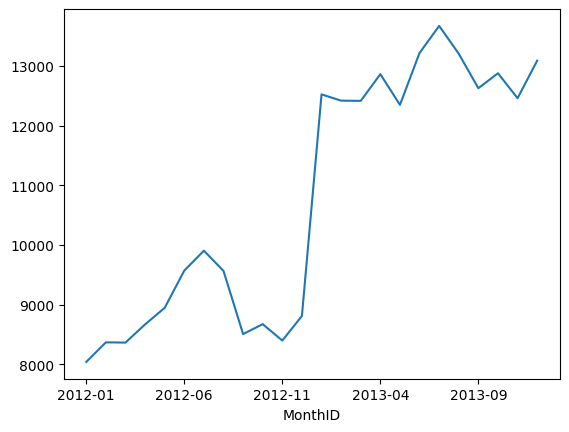

In [ ]:
#SUM Profit by month
Month_profit = df.groupby('MonthID')['Profit'].sum()
print(Month_profit)
display(Month_profit.plot())

              Product  Profit
0            Amaretto    2907
1         Caffe Latte    6739
2         Caffe Mocha   10477
3           Chamomile   16138
4           Colombian   33027
5          Darjeeling   17209
6      Decaf Espresso   17477
7   Decaf Irish Cream    8281
8           Earl Grey   14313
9           Green Tea    -141
10              Lemon   17674
11               Mint    3643
12   Regular Espresso    5973


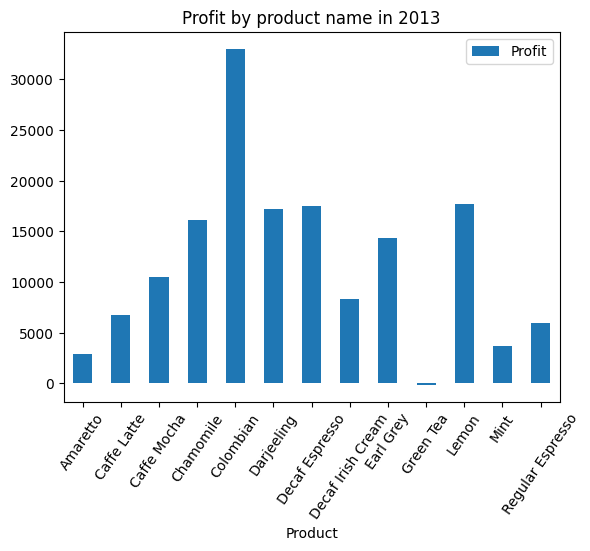

In [ ]:
#Show profit by product in 2013 -- Which one made the most profit
P_product = df[df['Ddate'].dt.year == 2013].groupby('Product')['Profit'].sum().reset_index()
print(P_product)
P_product.plot.bar(x='Product', y='Profit', rot=55, title = 'Profit by product name in 2013')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
#Profit by product type and product in 2013
Profit_cat = df[df['Ddate'].dt.year == 2013].groupby(['Product', 'Product Type'])['Profit'].sum().reset_index()
print(Profit_cat)

              Product Product Type  Profit
0            Amaretto       Coffee    2907
1         Caffe Latte     Espresso    6739
2         Caffe Mocha     Espresso   10477
3           Chamomile   Herbal Tea   16138
4           Colombian       Coffee   33027
5          Darjeeling          Tea   17209
6      Decaf Espresso     Espresso   17477
7   Decaf Irish Cream       Coffee    8281
8           Earl Grey          Tea   14313
9           Green Tea          Tea    -141
10              Lemon   Herbal Tea   17674
11               Mint   Herbal Tea    3643
12   Regular Espresso     Espresso    5973


,Product,Cogs,Profit,Coffee Sales,Net_profit_margin
0,Amaretto,6366,2907,13428,21.648794
1,Caffe Latte,7647,6739,18340,36.744820
2,Caffe Mocha,18995,10477,43367,24.158923
3,Chamomile,15693,16138,38609,41.798544
4,Colombian,24198,33027,65487,50.432910
5,Darjeeling,15267,17209,37352,46.072499
6,Decaf Espresso,16659,17477,39922,43.777867
7,Decaf Irish Cream,14784,8281,31779,26.058089
8,Earl Grey,14277,14313,34102,41.971145
9,Green Tea,9539,-141,16785,-0.840036


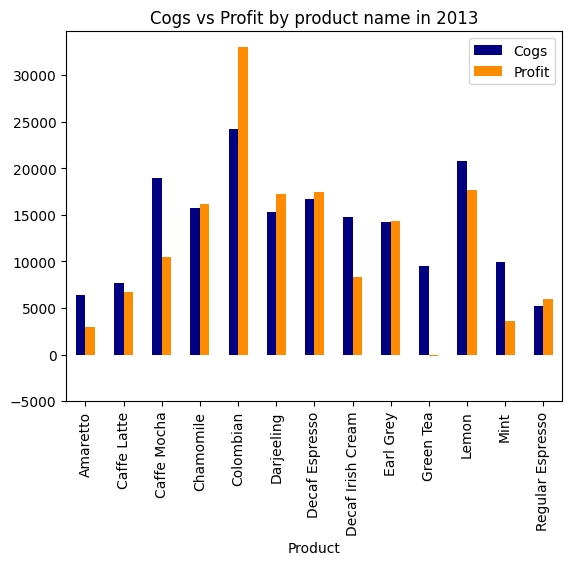

In [ ]:
#Compare cost of good (COG) and profit by each product name in 2013 --> Show %of profit from product cost
#Review cost of good - 1st visualize
import seaborn as sns
import matplotlib.pyplot as plt

cnp = df[df['Ddate'].dt.year == 2013].groupby('Product').aggregate({'Cogs': 'sum', 'Profit':'sum', 'Coffee Sales': 'sum'}).reset_index()
cnp['Net_profit_margin'] = (cnp['Profit']/cnp['Coffee Sales'])*100

display(cnp)

vis_cost = cnp.plot(kind = 'bar',
                    x='Product',
                    y= ['Cogs', 'Profit'],
                    title = 'Cogs vs Profit by product name in 2013',
                    color = ['Navy', 'Darkorange'])

plt.ylim(bottom = -5000)
plt.show()

Year   2012   2013
Month             
01     8041  12524
02     8369  12419
03     8365  12415
04     8670  12863
05     8947  12348
06     9571  13218
07     9905  13671
08     9566  13205
09     8508  12627
10     8674  12878
11     8399  12460
12     8811  13089


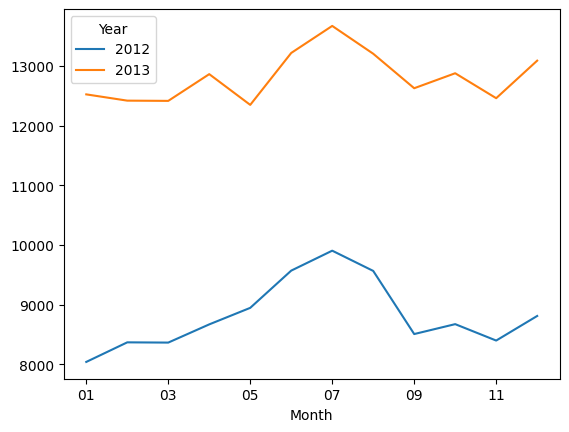

In [ ]:
pivot_df = pd.pivot_table(df,
                          values = "Profit",
                          index = "Month",
                          columns = "Year",
                          aggfunc = "sum",
                          margins = False)

print(pivot_df)

pivot_df.plot()
plt.show()